In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import networkx as nx
import matplotlib.pyplot as plt
import os

In [ ]:
### 以asthma为例，根据核心基因是否可以区分性状相关组织和不相关组织

results = pd.read_excel(r"E:\0_单细胞1\results\results.xlsx",sheet_name="corelcczscore-tissue")
# pvalue小于0.005的细胞类型
results_related = results[results["fisher's pvalue"]<=0.005]
yes_tissue = list(results_related["tissue"])
no_tissue = list(set(results["tissue"]) - set(yes_tissue))

## 把所有组织核心基因的pvalue组合到一个表
all_df = pd.DataFrame()
tissuelist = os.listdir(r"E:\0_单细胞1\results\lcczscore-pip")
for tissue in tissuelist:
    # df = pd.read_csv(r"E:\0_单细胞1\results\wilxon test of each tissue with alltissues only expressed\core\%s.csv"%tissue)
    df = pd.read_csv(r"E:\0_单细胞1\results\wilxon test of each tissue with alltissues\core\%s.csv"%tissue)
    df_sorted = df.sort_values("Column")
    all_df[tissue] = df_sorted["P-Value"]
all_df.index = df_sorted["Column"]


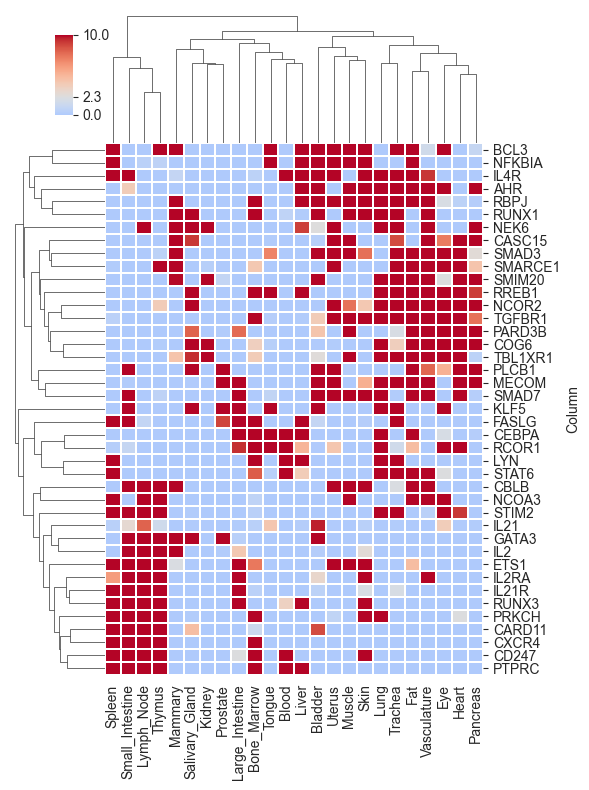

In [6]:
# 绘制热力图
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt

epsilon = 1e-10
import seaborn as sns
x = -np.log10(0.005 + epsilon)
sns.clustermap(-np.log10(all_df + epsilon), cmap="coolwarm", figsize=(6,8),
                method='average',
                metric='euclidean',
               row_cluster=True,col_cluster=True,
               xticklabels=True, yticklabels=True,
               cbar_pos=(0.1, 0.85, 0.03, 0.1),
               cbar_kws={'ticks': [0, x, 10]},
               center=x, linewidths = 0.02)
plt.savefig(r"E:\00_CeSOP\results\figures\10.jpg")

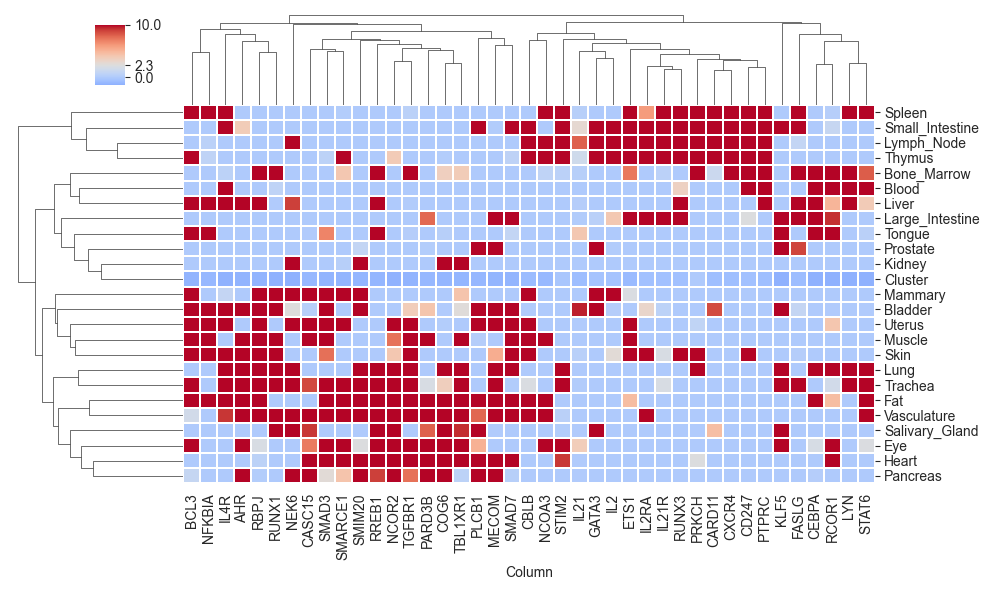

In [62]:
# 绘制热力图
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt

epsilon = 1e-10
import seaborn as sns
x = -np.log10(0.005 + epsilon)
sns.clustermap(-np.log10(all_df.T + epsilon), cmap="coolwarm", figsize=(10,6),
                method='average', 
                metric='euclidean',
               row_cluster=True,col_cluster=True,
               xticklabels=True, yticklabels=True, 
               cbar_pos=(0.1, 0.85, 0.03, 0.1),
               cbar_kws={'ticks': [0, x, 10]},
               center=x, linewidths = 0.03)

'''提取聚类结果----基因'''
# 计算余弦距离矩阵
cosine_distance = pdist(-np.log10(all_df + epsilon),metric='euclidean')  # Transpose to calculate column distances
# 生成层次聚类
linkage_matrix = sch.linkage(cosine_distance,method='average')
# 划分簇，设置簇数为3
cluster_assignments = sch.fcluster(linkage_matrix, t=2, criterion='maxclust')
# 添加簇分配结果到 DataFrame
all_df['Cluster'] = cluster_assignments

meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


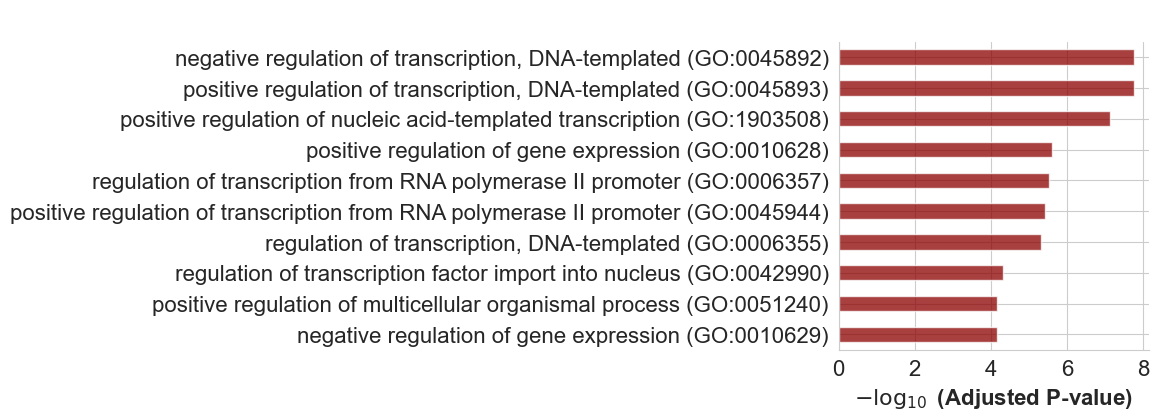

In [70]:
import gseapy as gp

# 读取基因列表
genelist = list(all_df[(all_df["Cluster"]==1)].index)
# GO富集分析，pdf结果会自动保存到GO_BP_enrichr下
result_go = gp.enrichr(gene_list=genelist, 
                        organism='human', 
                        gene_sets='GO_Biological_Process_2018', 
                        # description='test', 
                        outdir=r"GO_BP_enrichr")
# 
# # KEGG富集分析，pdf结果会自动保存到 KEGG_enrichr 目录下
# result_kegg = gp.enrichr(gene_list=genelist, 
#                           organism='human', 
#                           gene_sets='KEGG_2021_Human', 
#                         #   description='test', 
#                           outdir=r"KEGG_enrichr")

## 富集结果查看
# 获取富集分析结果
result_go.res2d

## 画图
from gseapy import barplot, dotplot
ax = barplot(result_go.res2d,title=' ', figsize=(4, 4), color='darkred')
plt.show()
# ax1 = dotplot(result_kegg.res2d,title=' ', figsize=(4, 5), color='darkred')
# plt.show()

meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


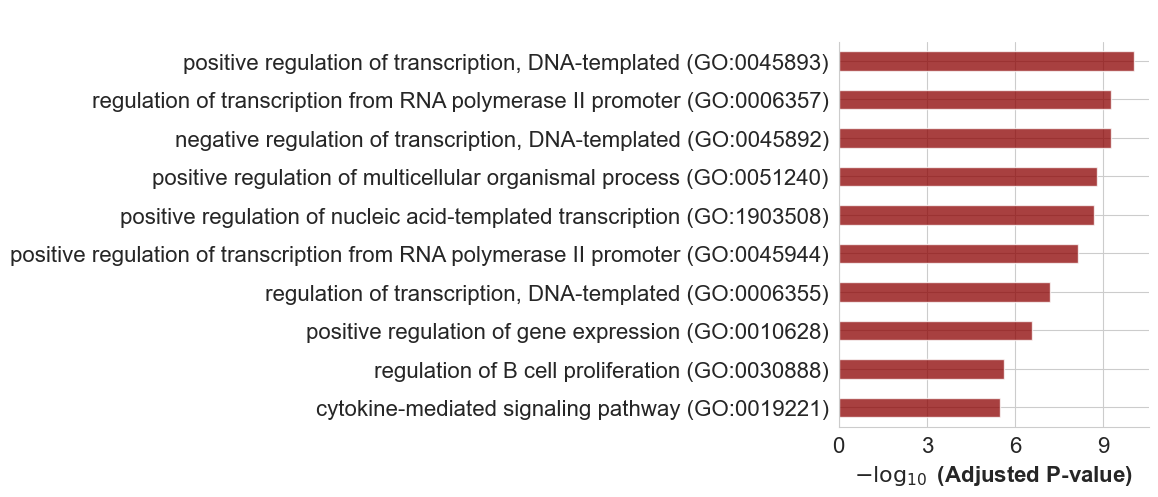

In [55]:
import gseapy as gp
import pandas as pd


# 读取基因列表
genelist = list(all_df.index)
# GO富集分析，pdf结果会自动保存到GO_BP_enrichr下
result_go = gp.enrichr(gene_list=genelist, 
                        organism='human', 
                        gene_sets='GO_Biological_Process_2018', 
                        # description='test', 
                        outdir=r"GO_BP_enrichr")


## 富集结果查看
result_go.res2d
## 画图
from gseapy import barplot, dotplot
ax = barplot(result_go.res2d,title=' ', figsize=(4, 5), color='darkred')
plt.show()

meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


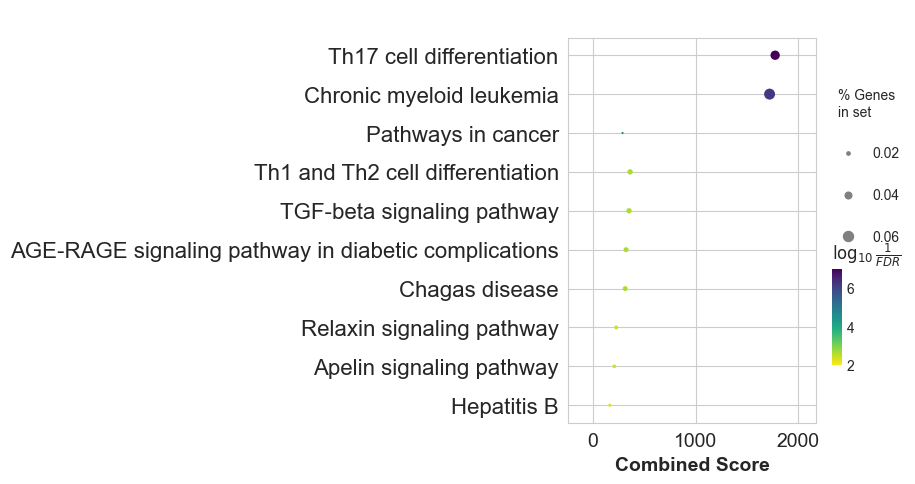

In [75]:
import gseapy as gp

# 读取基因列表
genelist = list(all_df[(all_df["Cluster"]==1)].index)
# KEGG富集分析，pdf结果会自动保存到 KEGG_enrichr 目录下
result_kegg = gp.enrichr(gene_list=genelist, 
                          organism='human', 
                          gene_sets='KEGG_2021_Human', 
                          outdir=r"KEGG_enrichr")
## 富集结果查看
# 获取富集分析结果
result_kegg.res2d
## 画图
from gseapy import barplot, dotplot
ax1 = dotplot(result_kegg.res2d,title=' ', figsize=(4, 5), color='darkred',size = 20)
plt.show()

meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


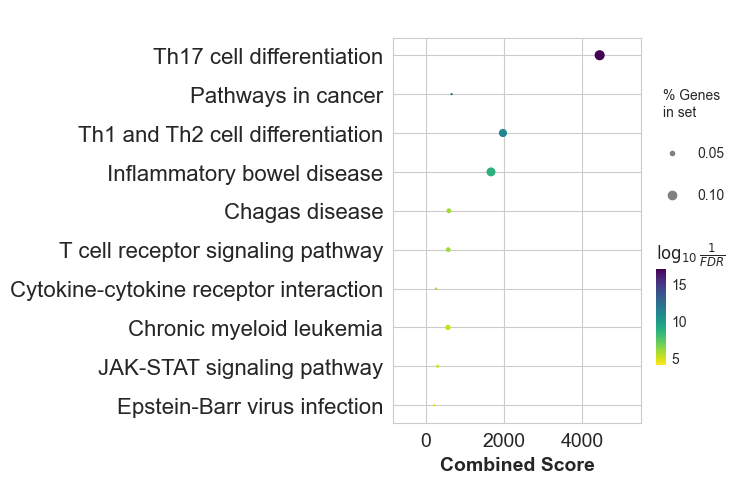

In [77]:
import gseapy as gp

# 读取基因列表
genelist = list(all_df.index)
# KEGG富集分析，pdf结果会自动保存到 KEGG_enrichr 目录下
result_kegg = gp.enrichr(gene_list=genelist, 
                          organism='human', 
                          gene_sets='KEGG_2021_Human', 
                        #   description='test', 
                          outdir=r"KEGG_enrichr")
## 富集结果查看
# 获取富集分析结果
result_kegg.res2d
## 画图
from gseapy import barplot, dotplot
ax1 = dotplot(result_kegg.res2d,title=' ', figsize=(4, 5), color='darkred',size = 10)
plt.show()

In [2]:
results = pd.read_excel(r"E:\0_单细胞1\results\results.xlsx", sheet_name="corelcczscore-tissue")
results_sorted = results.sort_values(by = "fisher's pvalue") # 将组织按照与性状的相关性排序
tissue_list = list(results_sorted["tissue"])

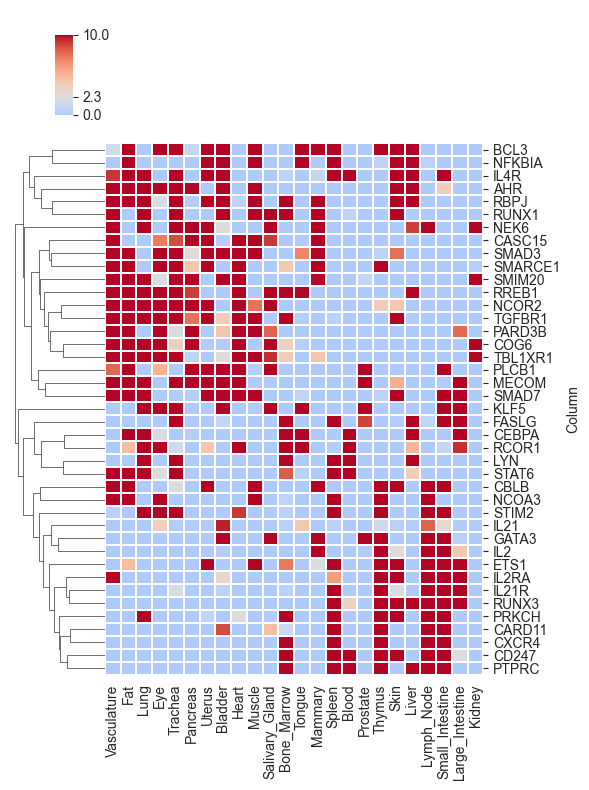

In [7]:
### 以asthma为例，根据核心基因是否可以区分性状相关组织和不相关组织
results = pd.read_excel(r"E:\0_单细胞1\results\results.xlsx", sheet_name="corelcczscore-tissue")
results_sorted = results.sort_values(by = "fisher's pvalue") #按照与性状的相关性排序
tissuelist = list(results_sorted["tissue"])

## 把所有组织核心基因的pvalue组合到一个表
all_df = pd.DataFrame()
for tissue in tissuelist:
    df = pd.read_csv(r"E:\0_单细胞1\results\wilxon test of each tissue with alltissues\core\%s.csv" % tissue)
    df_sorted = df.sort_values("Column")
    all_df[tissue] = df_sorted["P-Value"]
all_df.index = df_sorted["Column"]

# 绘制热力图
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
import seaborn as sns

epsilon = 1e-10
x = -np.log10(0.005 + epsilon)
#左侧颜色条
row_c = dict(zip(pd_iris['class'].unique(), ['green','yellow','pink']))
sns.clustermap(data=pd_iris,
               row_colors=pd_iris['class'].map(row_c), #行方向聚类用颜色区分不同类               
              )
sns.clustermap(-np.log10(all_df + epsilon), cmap="coolwarm", figsize=(6, 8),
               method='average',
               metric='euclidean',
               row_cluster=True, col_cluster=False,
               xticklabels=True, yticklabels=True,
               cbar_pos=(0.1, 0.85, 0.03, 0.1),
               cbar_kws={'ticks': [0, x, 10]},
               center=x, linewidths=0.02)

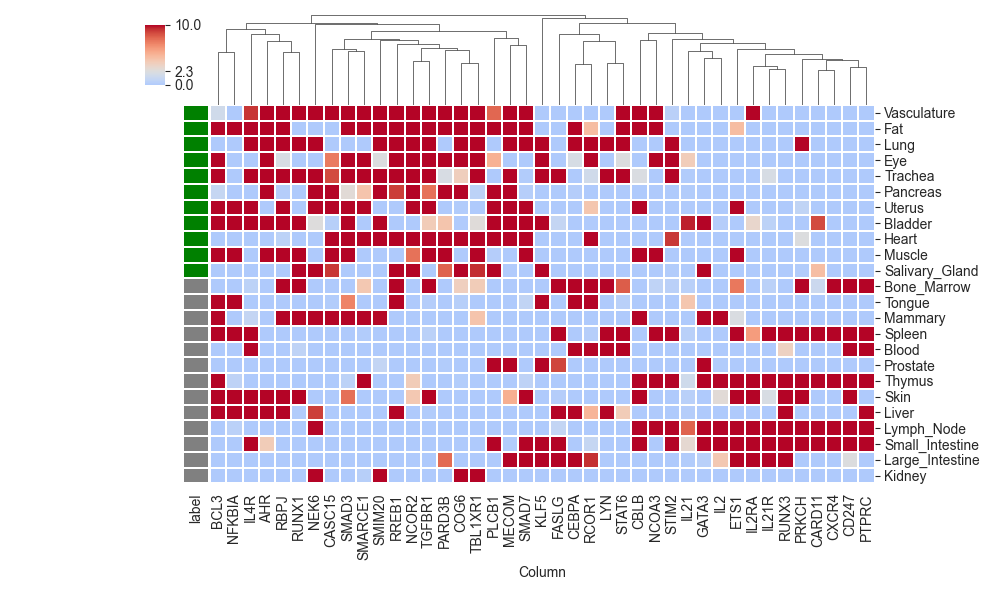

In [24]:
import seaborn as sns
# 绘制热力图
epsilon = 1e-10
x = -np.log10(0.005 + epsilon)
#左侧颜色条
alldf_T = all_df.T
alldf_T["label"] = np.where(results["fisher's pvalue"] > 0.005, 0, 1)
row_c = dict(zip(alldf_T['label'].unique(), ['green','grey']))
sns.clustermap(-np.log10(alldf_T.iloc[:,:-1] + epsilon), cmap="coolwarm", figsize=(10, 6),
               method='average',
               metric='euclidean',
               row_cluster=False, col_cluster=True,
               xticklabels=True, yticklabels=True,
               cbar_pos=(0.15, 0.85, 0.02, 0.1),
               row_colors=alldf_T["label"].map(row_c), #行方向聚类用颜色区分不同类 
               cbar_kws={'ticks': [0, x, 10]},
               center=x, linewidths=0.01)

In [87]:
'''对基因提取聚类结果'''
# 计算余弦距离矩阵
cosine_distance = pdist(-np.log10(all_df + epsilon), metric='euclidean')  # Transpose to calculate column distances
# 生成层次聚类
linkage_matrix = sch.linkage(cosine_distance, method='average')
# 划分簇，设置簇数为3
cluster_assignments = sch.fcluster(linkage_matrix, t=2, criterion='maxclust')
# 添加簇分配结果到 DataFrame
all_df['Cluster'] = cluster_assignments

In [91]:
corr_genes = all_df[all_df['Cluster']==1].index
Lcc(G,corr_genes)

15

In [92]:
corr_genes

Index(['AHR', 'BCL3', 'CASC15', 'COG6', 'IL4R', 'MECOM', 'NCOR2', 'NEK6',
       'NFKBIA', 'PARD3B', 'PLCB1', 'RBPJ', 'RREB1', 'RUNX1', 'SMAD3', 'SMAD7',
       'SMARCE1', 'SMIM20', 'TBL1XR1', 'TGFBR1'],
      dtype='object', name='Column')

In [90]:
corr_genes = all_df[all_df['Cluster']==2].index
Lcc(G,corr_genes)

16

In [32]:
'''读取背景网络'''
def openPPI(filename):
    '''
        打开PPI
        文件格式 gene1_name gene1_id gene2_name gene2_id
        返回值：网络[节点是gene name]
    '''
    G = nx.Graph()
    a=open(filename,"r")
    next(a)

    for i in a:
        n=i.strip().split("\t")
        G.add_edge(n[0],n[3])
        G.add_node(n[0])
        G.add_node(n[3])
    a.close()
    return G

G = openPPI(r"E:\00_CeSOP\data\network(process_id).txt")

In [33]:
# 计算最大连通分支
def Lcc(G,nodes):
    '''
        输入图网络和一个列表，计算最大连通分支lcc
        如果空节点集合，返回0；子图不联通，返回1；否则返回最大连通分支
        G：图，这里图中的节点是基因name
        genename：用于计算lcc的genename列表
    '''

    g = nx.subgraph(G,nodes)
    if len(nodes)==0:
        largest = 0
    else:
        try:
            l = max(nx.connected_components(g),key=len)  #如果随机选取的gene没有连通分支的话，会报错，添加判断条件
            largest = len(l)     #最大联通分支
        except ValueError as e:
            l = nodes[0]    # 假设genename列表中的第一个基因为最大连通分支
            largest = 1        #设置最大联通分支数为1
    return largest
    
# 计算节点重要性
def nodeImportance(G,nodes):
    '''
    如果一个节点的删除导致了连通分支（或连通组件）的显著分裂，那么这个节点可以被视为一个关键节点或割点（articulation point）
    :param G:
    :return: 节点重要性字典
    '''
    
    original_max_size = Lcc(G,nodes)
    # 计算节点的重要程度
    node_importance = {}
    for node in nodes:
        # 删除节点后，重新计算lcc
        # 使用列表推导式创建新列表，不包含要移除的元素
        new_nodes = [element for element in nodes if element != node]
        new_max_size = Lcc(G,new_nodes)
        node_importance[node] = original_max_size - new_max_size
    return node_importance

In [70]:
## 可视化最大连通分支,节点大小表示度中心性
def viewNx1(nodes,title):
    '''

    :param g: 子图
    :param flag: 核心还是外围
    :return: 可视化结果
    '''

    node_importance = nodeImportance(G,nodes)
    g = nx.subgraph(G,nodes)

    # 连通分支（核心）的子图可视化
    options = {
        'node_color': 'skyblue',
        'node_size' : 50,
        # 'width': 2,
        'font_size': 8,
        'font_color': 'black',
        # 设置边的属性
        'edge_color' :'grey',
        }
    # 使用Kamada-Kawai布局算法
    pos = nx.kamada_kawai_layout(g)
    plt.figure(figsize=(4, 4),dpi = 150)  # 增加图形大小以减少重叠
    # 绘制节点和边
    nx.draw_networkx(
        g,pos,**options)
    plt.title(title)
    plt.grid(False)
    plt.show()



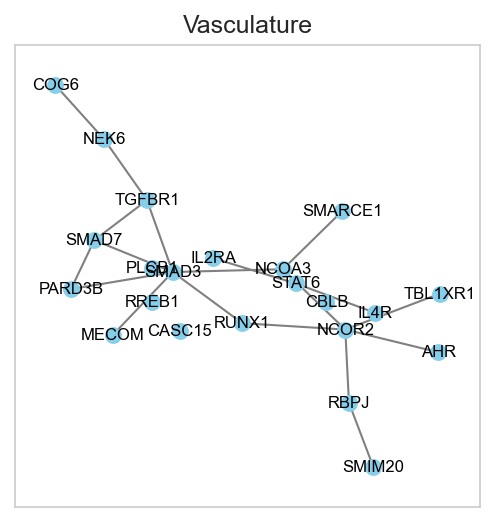

In [73]:
## 某个组织上显著表达的基因组成的子图
results = pd.read_excel(r"E:\0_单细胞1\results\results.xlsx", sheet_name="corelcczscore-tissue")
results_sorted = results.sort_values(by = "fisher's pvalue") # 将组织按照与性状的相关性排序
tissue_list = list(results_sorted["tissue"])
for tissue in tissue_list[0:1]:
    df = pd.read_csv(r"E:\0_单细胞1\results\wilxon test of each tissue with alltissues\core\%s.csv" % tissue,index_col=0)
    signi_genes = list(df[df["P-Value"]<0.005]["Column"])
    viewNx1(signi_genes,tissue)

In [ ]:
# 相关组织和不相关组织中显著表达的基因的最大连通分支

In [75]:
results = pd.read_excel(r"E:\0_单细胞1\results\results.xlsx", sheet_name="corelcczscore-tissue")
results_sorted = results.sort_values(by = "fisher's pvalue") # 将组织按照与性状的相关性排序
tissue_list = list(results_sorted["tissue"])
lcc_list = []
for tissue in tissue_list:
    df = pd.read_csv(r"E:\0_单细胞1\results\wilxon test of each tissue with alltissues\core\%s.csv" % tissue,index_col=0)
    signi_genes = list(df[df["P-Value"]<0.005]["Column"])
    lcc = Lcc(G,signi_genes)
    lcc_list.append(lcc)

([<matplotlib.axis.XTick at 0x1f29f6b8eb0>,
 [Text(1, 0, 'Corr'), Text(2, 0, 'No Corr')])

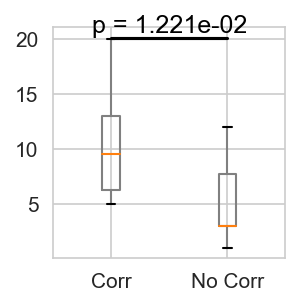

In [84]:
# 箱线图
plt.figure(figsize=(2, 2),dpi = 150)
box = plt.boxplot([lcc_list[0:10],lcc_list[10:]], boxprops=dict(color='grey'), whiskerprops=dict(color='grey'))

from scipy.stats import mannwhitneyu
# 计算 p 值
stat, p_value = mannwhitneyu(lcc_list[0:10], lcc_list[10:], alternative='two-sided')
# t_stat, p_value = ttest_ind(ttlist, tNotlist)
# 在箱体之间添加标示线和 p 值
x1, x2 = 1, 2
y, h, col = max(max(lcc_list[0:10]), max(lcc_list[10:])) + 0.05, 0.05, 'k'
plt.plot([x1, x1, x2, x2], [y, y + h, y + h, y], lw=1.5, c=col)
plt.text((x1 + x2) * .5, y + h, f"p = {p_value:.3e}", ha='center', va='bottom', color=col, fontsize=12)

# # 绘制散点图
# for i, d in enumerate([lcc_list[0:10],lcc_list[10:]], 1):
#     y = d
#     x = np.random.normal(i, 0.04, size=len(y))  # 在x轴位置上添加一些随机抖动
#     plt.scatter(x, y, alpha=0.6, s=2)

# 设置自定义横轴坐标值和标签
custom_ticks = [1, 2]  # 自定义的横轴坐标值 
custom_labels = ["Corr", "No Corr"]  # 对应的标签
plt.xticks(custom_ticks, custom_labels)